<center><u><H1>K-Nearest Neighbors (KNN)</H1></u></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading the data:

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing the data:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Creating the model:

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)

In [6]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Metrics:

In [7]:
knn_pred = knn.predict(X_test_std)
print(f"Predictions: {knn_pred}")

Predictions: [0 0 2 1 2 0 2 0 1 2 2 2 2 1 0 1 2 1 0 2 0 2 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0
 2 0 1 0 1 0 2 1]


In [9]:
print(f"Accuracy Score:{accuracy_score(y_test,knn_pred)}")

Accuracy Score:0.9555555555555556


In [10]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test,knn_pred)}")

Confusion Matrix:
[[18  1  0]
 [ 0  9  1]
 [ 0  0 16]]


In [11]:
print(f"Classification Report:\n{classification_report(y_test,knn_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.90      0.90      0.90        10
           2       0.94      1.00      0.97        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Cross Validation:

In [12]:
scores = cross_val_score(knn, X_train_std, y_train, cv=10, scoring='accuracy')
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         1.         0.90909091 1.         0.9        1.
 1.         0.9        0.8        0.7       ]


In [13]:
print(f"Cross Val Scores Mean:{scores.mean():0.3f} / Cross Val Scores Std:{scores.std():0.3f}")

Cross Val Scores Mean:0.921 / Cross Val Scores Std:0.098


In [14]:
K = [1, 3, 5, 8, 10]
for k in K:
    knn_ = KNN(n_neighbors=k).fit(X_train_std, y_train)
    knn_pred_ = knn_.predict(X_test_std)
    print(f'accuracy score for k={k} is: {accuracy_score(y_test,knn_pred_)}')

accuracy score for k=1 is: 0.9777777777777777
accuracy score for k=3 is: 0.9555555555555556
accuracy score for k=5 is: 0.9555555555555556
accuracy score for k=8 is: 0.9777777777777777
accuracy score for k=10 is: 0.9777777777777777


## Drawing for differents K:

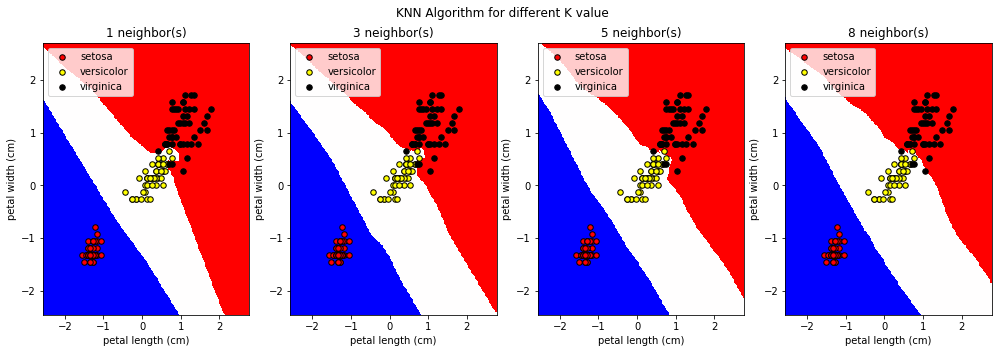

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(17, 5))
n_classes = len(np.unique(y))
plot_colors = ["red","yellow","black"]

res = 0.02
X2D = X_std[:,[2,3]]

x1min, x1max = X2D[:,0].min() -1, X2D[:,0].max() + 1
x2min, x2max = X2D[:,1].min() -1, X2D[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

for k, ax in zip([1, 3, 5, 8], axs):
    knn = KNN(n_neighbors=k).fit(X2D, y)
    output = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1,xx2, output, cmap=plt.cm.bwr)
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    ax.set_title(f"{k} neighbor(s)")  
    plt.suptitle("KNN Algorithm for different K value")
    
    for cl, color in zip(range(n_classes), plot_colors):  
        ax.scatter(X2D[y==cl, 0], X2D[y==cl, 1], s=30, marker='o', c=color, edgecolor='k', label=iris.target_names[cl])
        ax.legend(loc='best', fancybox=True)

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html